In [1]:
!nvidia-smi

Thu Nov  9 13:30:59 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.92                 Driver Version: 545.92       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1080 Ti   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   36C    P8              12W / 280W |    505MiB / 11264MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import pandas as pd
from os import listdir
from matplotlib import image as mpimg
import cv2

import pandas as pd
import matplotlib as mat
import numpy as np
import os
import json
import cv2
import random
import sklearn
import pybboxes as pbx
import pydot
import json
import tqdm
import shapely
import yaml
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
# Directory Initialization

#Training
training_image = "D:/Benji/deepfashion2_dataset/train/image"
training_annos = "D:/Benji/deepfashion2_dataset/train/annos"

#Validation
val_image = "D:/Benji/deepfashion2_dataset/validation/image"
val_annos = "D:/Benji/deepfashion2_dataset/validation/annos"

#Test
training_image = "D:/Benji/deepfashion2_dataset/test/image"

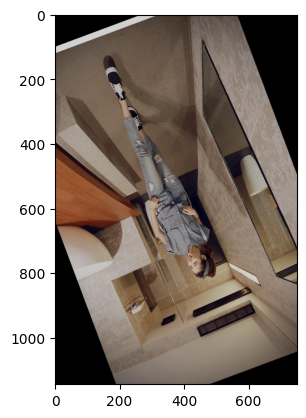

In [3]:
img_id = "000080"
image = mpimg.imread(f"D:/Benji/dataset_aug/images/train/{img_id}.jpg")
plt.imshow(image)
plt.show()

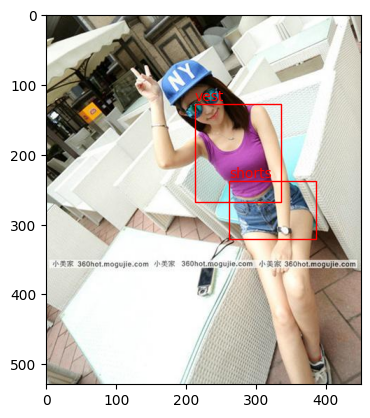

In [11]:
# Initialize the 'full' list if it's not already
# full = []

# Corrected the path for annotations
train_annotation = os.listdir("D:/Benji/dataset_aug/labels/train/")
train_images = os.listdir("D:/Benji/dataset_aug/images/train/")

# Corrected the way to open and read the JSON file
with open(f"D:/Benji/deepfashion2_dataset/train/annos/{img_id}.json", 'r') as f:
    data = json.load(f)
    
img = cv2.imread(f"D:/Benji/deepfashion2_dataset/train/image/{img_id}.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Create a figure and axis for the plot
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Loop through each item in the data
for item_key in data.keys():
    if item_key.startswith('item'):  # Assuming the keys for items start with 'item'
        bound = data[item_key]['bounding_box']
        catid = data[item_key]['category_id']
        cat = data[item_key]['category_name']
        segment = data[item_key]['segmentation']

        # Extract bounding box coordinates
        x1, y1, x2, y2 = bound

        # Create a rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')

        # Add the rectangle to the plot
        ax.add_patch(rect)

        # Optionally display category name on the image
        plt.text(x1, y1 - 5, cat, color='red')

        data_dict = bound, catid, cat

# Show the plot
plt.show()
